In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

### Brightness

In [2]:
image = plt.imread('princeton_small.jpg')

In [3]:
def brightness(img, alpha):
    
    bright_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype = np.uint8)
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            for depth in range(img.shape[2]):
                pixel = img[row, col, depth]
                if pixel * alpha < 255:
                    bright_img[row, col, depth] = pixel * alpha + (1 - alpha) * 0.0
                else:
                    bright_img[row, col, depth] = 255
    return bright_img

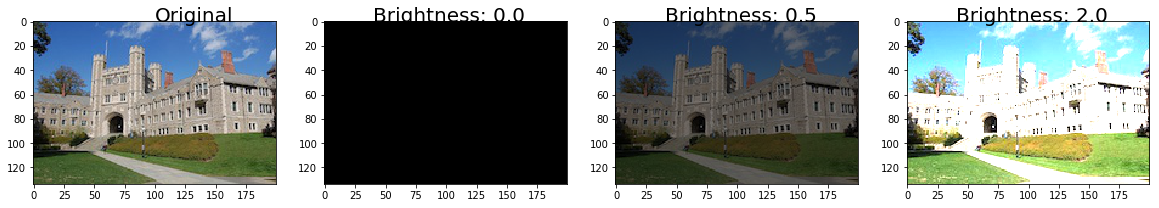

In [4]:
brightness_factor = [0.0, 0.5, 2.0]

fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 1
for i in range(1, columns*rows + 1):
    if i == 1:
        img = image
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.annotate('Original',xy=(0, 0), xytext=(100,0), fontsize=20)
    else:
        img = brightness(image, brightness_factor[i-2])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.annotate('Brightness: {}'.format(brightness_factor[i-2]),xy=(0, 0), xytext=(40,0), fontsize=20)
plt.show()


### Contrast

In [5]:
image = plt.imread('c.jpg')

In [6]:
def avg_luma(img):
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    
    luma = 0.299*r + 0.587*g + 0.144*b
    
    return np.mean(luma)
    
    

def contrast(img, alpha, average_luma):
    
    contrast_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype = np.uint8)
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            
            for depth in range(img.shape[2]):
                pixel = img[row, col, depth]
                
                if pixel * alpha < 255:
                    contrast_img[row, col, depth] = pixel * alpha + (1 - alpha) * avg_luminance
                else:
                    contrast_img[row, col, depth] = 255 
            
    return contrast_img


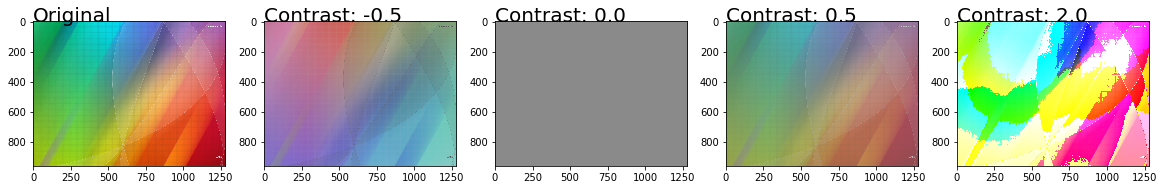

In [7]:
avg_luminance = avg_luma(image)

contrast_factor = [-0.5, 0.0, 0.5, 2.0]

fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 1
for i in range(1, columns*rows + 1):
    if i == 1:
        img = image
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.annotate('Original',xy=(0, 0), xytext=(0,0), fontsize=20)
    else:
        img = contrast(image, contrast_factor[i-2], avg_luminance)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.annotate('Contrast: {}'.format(contrast_factor[i-2]),xy=(0, 0), xytext=(0,0), fontsize=20)
plt.show()


### Blur

In [8]:
image = plt.imread('princeton_small.jpg')

In [9]:
def gaussian_filter(sigma):
    
    base_kernel_1 = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
    
    base_kernel_2 = np.transpose(base_kernel_1)
    
    gaussian_kernel = np.zeros((3, 3))
    
    for i in range(3):
        for j in range(3):
            gaussian_kernel[i, j] = np.exp((-(base_kernel_1[i, j] + base_kernel_2[i, j])**2) / (2 * (sigma**2)))
    
    return gaussian_kernel / np.sum(gaussian_kernel)



In [10]:
def blur(img, gauss_kernel, pad):
    
    
    kernel_shape = gauss_kernel.shape
    
    padded_img = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    
    blur_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype = np.uint8)
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            for depth in range(img.shape[2]):
                
                region = padded_img[row : row + kernel_shape[0], col : col + kernel_shape[1], depth]
                
                blur_img[row, col, depth] = np.sum(np.multiply(region, gauss_kernel))
    
    return blur_img.astype(np.uint8)

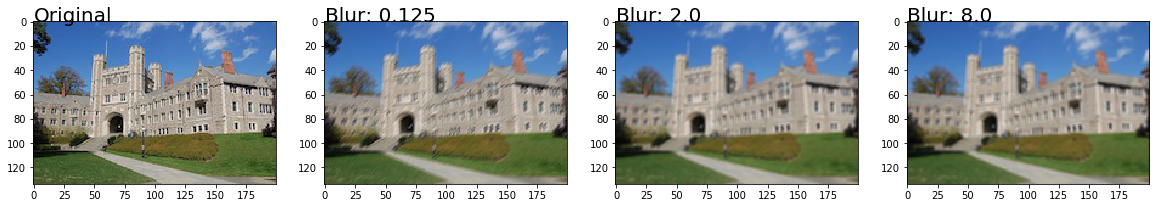

In [11]:
sigma = [0.125, 2.0, 8.0]

fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 1
for i in range(1, columns*rows + 1):
    if i == 1:
        img = image
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.annotate('Original',xy=(0, 0), xytext=(0,0), fontsize=20)
    else:
        gauss_kernel = gaussian_filter(sigma[i-2])
        img = blur(image, gauss_kernel, 1)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.annotate('Blur: {}'.format(sigma[i-2]),xy=(0, 0), xytext=(0,0), fontsize=20)
    
plt.show()


### Sharpen

In [12]:
image = plt.imread('princeton_small.jpg')

In [13]:
gauss_kernel = gaussian_filter(1)
blurred = blur(image, gauss_kernel, 1)

In [14]:
def high_pass(img, hp_kernel, pad):
    
    
    kernel_shape = hp_kernel.shape
    
    padded_img = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    
    hp_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype = np.uint8)
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            for depth in range(img.shape[2]):
                
                region = padded_img[row : row + kernel_shape[0], col : col + kernel_shape[1], depth]
                
                hp_img[row, col, depth] = np.sum(np.multiply(region, hp_kernel))
    
    return hp_img

In [15]:
highpass_kernel = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, -1]])

highpass_img = high_pass(blurred, highpass_kernel, 1)

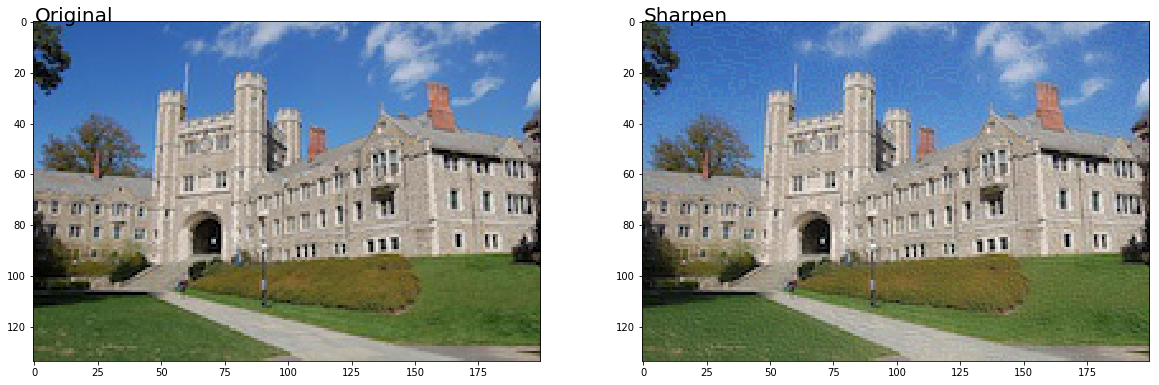

In [16]:
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 1
for i in range(1, columns*rows + 1):
    if i == 1:
        img = image
        fig.add_subplot(rows, columns, i)
        plt.imshow(img.astype(np.uint8))
        plt.annotate('Original',xy=(0, 0), xytext=(0,0), fontsize=20)
    else:
        img = image + highpass_img*0.05
        fig.add_subplot(rows, columns, i)
        plt.imshow(img.astype(np.uint8))
        plt.annotate('Sharpen',xy=(0, 0), xytext=(0,0), fontsize=20)

plt.show()


### Edge Detection

In [17]:
image = plt.imread('princeton_small.jpg')

In [18]:
gauss_kernel = gaussian_filter(1)
blurred = blur(image, gauss_kernel, 1)

In [19]:
def edge_detect(img, edge_detect_kernel, pad):
    
    
    kernel_shape = edge_detect_kernel.shape
    
    padded_img = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    
    edge_detect_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype = np.uint8)
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            for depth in range(img.shape[2]):
                
                region = padded_img[row : row + kernel_shape[0], col : col + kernel_shape[1], depth]
                
                edge_detect_img[row, col, depth] = np.abs(np.sum(np.multiply(region, edge_detect_kernel)))
    
    return edge_detect_img

In [20]:
edge_detection_kernel = np.array([[-1, -1, -1],
                                  [-1, 8, -1],
                                  [-1, -1, -1]])

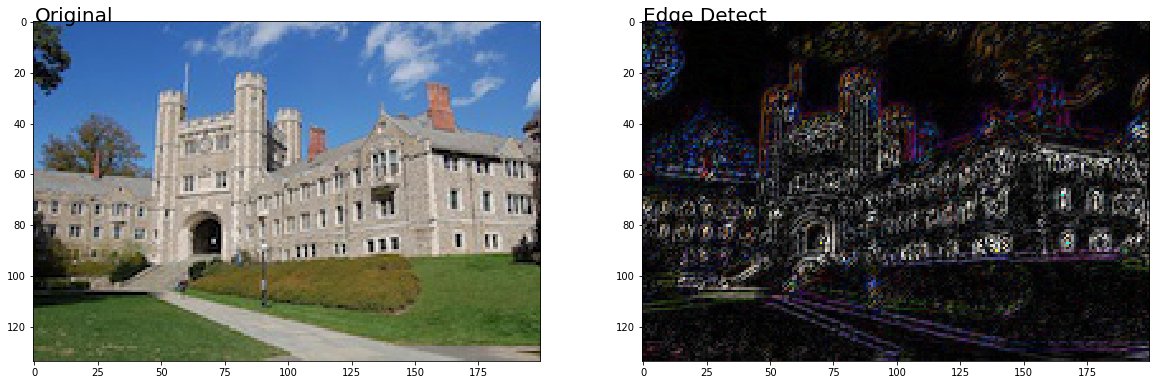

In [21]:
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 1
for i in range(1, columns*rows + 1):
    if i == 1:
        img = image
        fig.add_subplot(rows, columns, i)
        plt.imshow(img.astype(np.uint8))
        plt.annotate('Original',xy=(0, 0), xytext=(0,0), fontsize=20)
    else:
        img = edge_detect(blurred, edge_detection_kernel, 1)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img.astype(np.uint8))
        plt.annotate('Edge Detect',xy=(0, 0), xytext=(0,0), fontsize=20)

plt.show()

### Bilinear Interpolation

In [22]:
image = plt.imread('scaleinput.jpg')

In [23]:
def bilinear_interpolation(img, scale_x, scale_y):
    
    rows, cols, depth = img.shape
    
    new_rows, new_cols = int(round(rows * scale_x)), int(round(cols*scale_y))
 
    scaled_img = np.ones((new_rows, new_cols, depth))
    
    for i in range(new_rows):
        for j in range(new_cols):
            
            x_coord = j / scale_y
            y_coord = i / scale_x
            
            x1 = int(np.floor(x_coord))
            x2 = x1 + 1
            y1 = int(np.floor(y_coord))
            y2 = y1 + 1
            
            x1 = np.clip(x1, 0, img.shape[1]-1);
            x2 = np.clip(x2, 0, img.shape[1]-1);
            y1 = np.clip(y1, 0, img.shape[0]-1);
            y2 = np.clip(y2, 0, img.shape[0]-1);
            
            I_a = img[y1, x1, :]
            I_b = img[y2, x1, :]
            I_c = img[y1, x2, :]
            I_d = img[y2, x2, :]
            
            W_a = (x2 - x_coord) * (y2 - y_coord) 
            W_b = (x2 - x_coord) * (y_coord - y1)
            W_c = (x_coord - x1) * (y2 - y_coord)
            W_d = (x_coord - x1) * (y_coord - y1)
            
            out = W_a*I_a + W_b*I_b + W_c*I_c + W_d*I_d
            
            scaled_img[i, j, :] = out
            
    return scaled_img.astype(np.uint8)

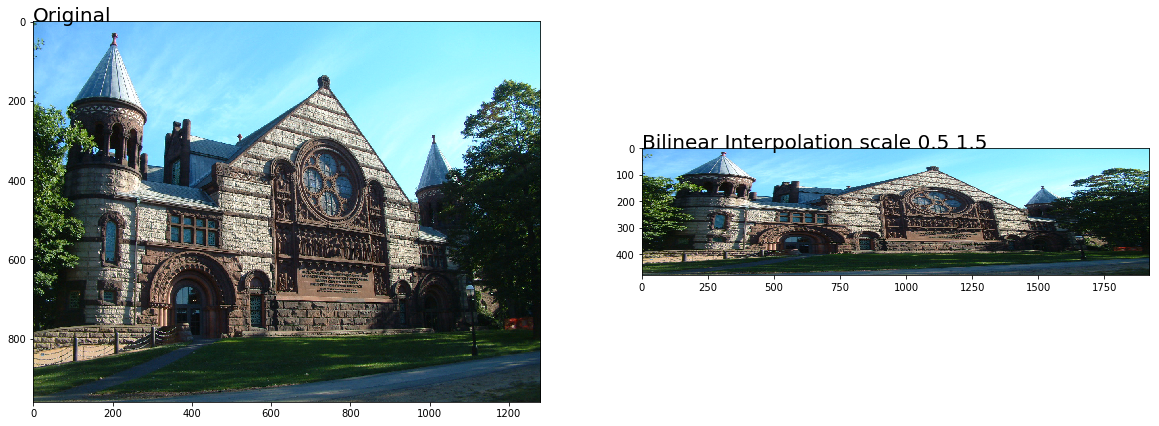

In [24]:
scale_x = 0.5
scale_y = 1.5

fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 1
for i in range(1, columns*rows + 1):
    if i == 1:
        img = image
        fig.add_subplot(rows, columns, i)
        plt.imshow(img.astype(np.uint8))
        plt.annotate('Original',xy=(0, 0), xytext=(0,0), fontsize=20)
    else:
        img = bilinear_interpolation(image, scale_x, scale_y)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img.astype(np.uint8))
        plt.annotate('Bilinear Interpolation scale {} {}'.format(scale_x, scale_y),xy=(0, 0), xytext=(0,0), fontsize=20)

plt.show()